| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), drinking water (Safe Drinking Water Act, SDWA) and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA). 

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. It is available at the Congressional District level for a selected state, and for counties and zip codes of your choosing. 

The EPA program acronyms are:
- CAA = Clean Air Act
- CWA = Clean Water Act
- SDWIS = Safe Drinking Water Information System
- RCRA = Resource Conservation and Recovery Act
- TRI = Toxics Release Inventory
- GHG = Greenhouse Gas Reporting Program


## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project, and run a few Python modules.

In [1]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Cross-Program.git -b enhancements-09-11
!pip install geopandas

%run ECHO_modules/DataSet.py
%run ECHO-Cross-Program/utilities.py
%run ECHO_modules/make_data_sets.py
print("Done!")

fatal: destination path 'ECHO_modules' already exists and is not an empty directory.
fatal: destination path 'ECHO-Cross-Program' already exists and is not an empty directory.
Done!


### 2.  Run this next cell to create the widget to choose whether you want to view facilities by state, county, congressional district or zip code.
Choose the type of region and proceed to the next cell.

If you return to choose a different type of region, remember to run this cell to properly reset the application.

In [2]:
region_type_widget = show_region_type_widget()
state_widget = None

Dropdown(description='Region of interest:', index=2, options=('State', 'Congressional District', 'County', 'Zi…

### 3.  Select your state of interest.  _If you are interested in a zip code analysis, this can be skipped._

In [3]:
state_widget = show_state_widget()

Dropdown(description='State:', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI'…

### 4.  Run this cell and choose the region you want to look at.
It will ask you to specify which Congressional District, county, or zip code you want to look at. If you want to look at an entire state, you should still run this cell, but you won't see any output.

For reference, here is a map of congressional districts: https://www.govtrack.us/congress/members/map

In [4]:
region_widget = None
region_type = region_type_widget.value
if ( region_type != 'State' ):
    region_widget = show_pick_region_widget( type=region_type,
                                           state_widget=state_widget )

Dropdown(description='District:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)

### 5. Chart the top violators in the region for CAA, CWA and RCRA.


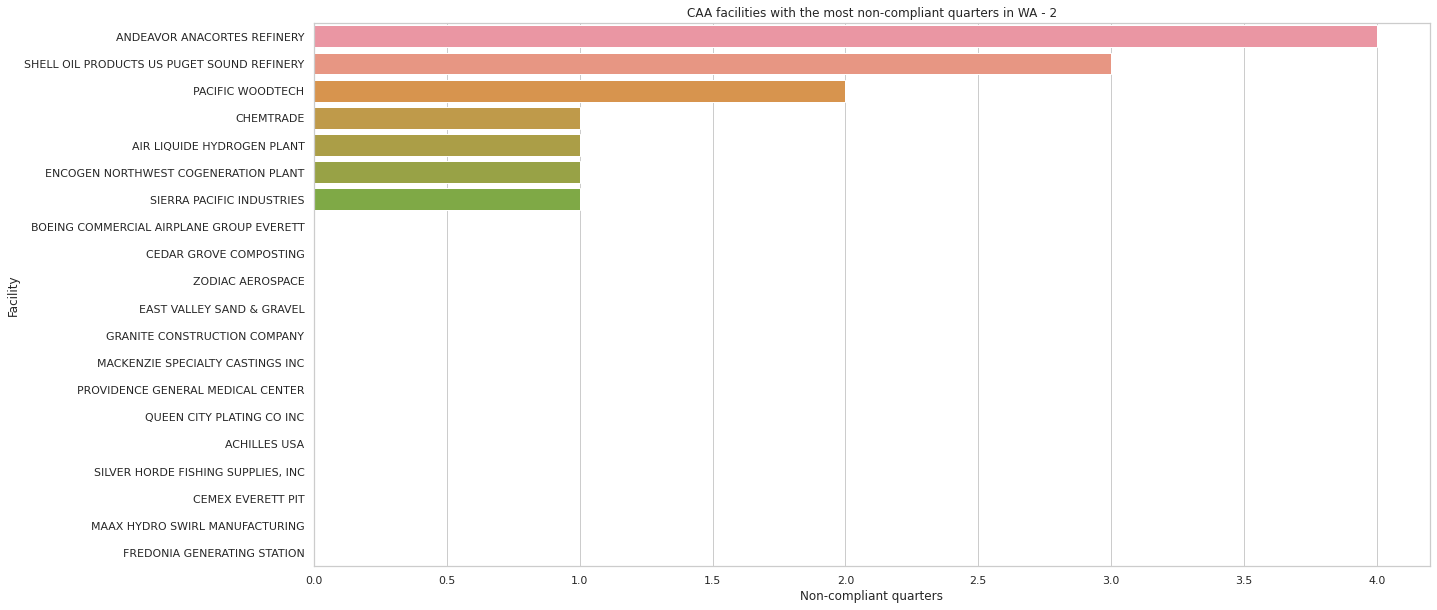

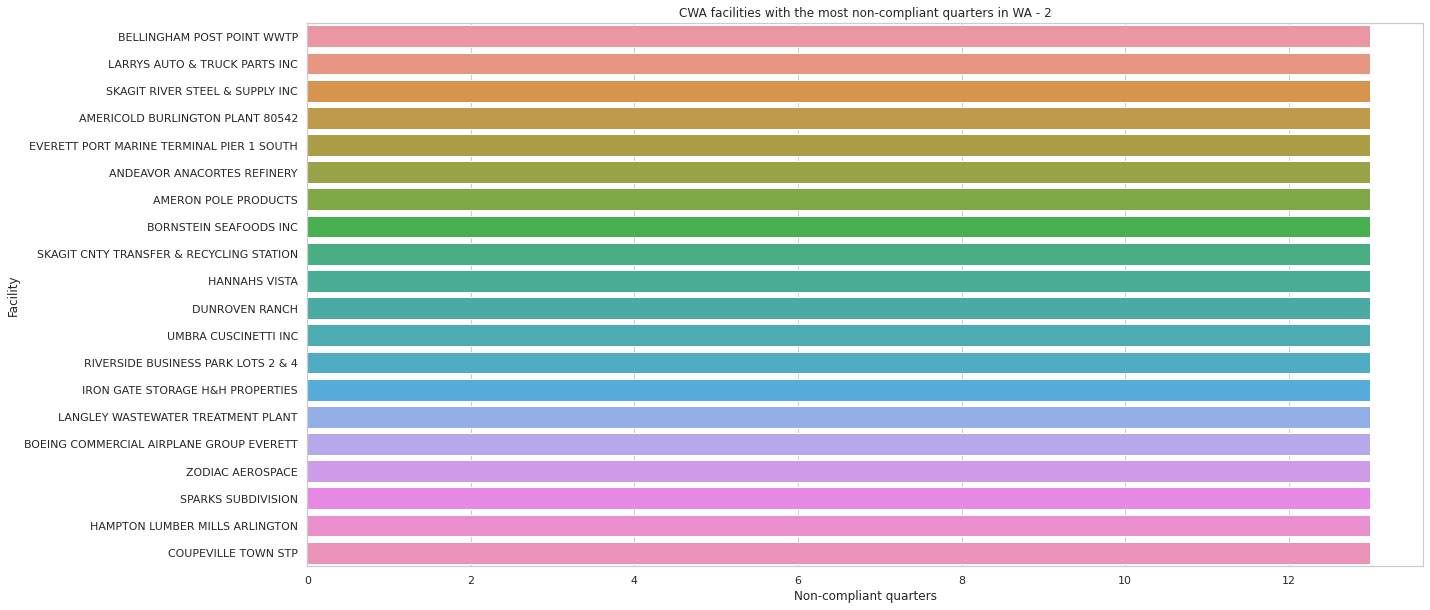

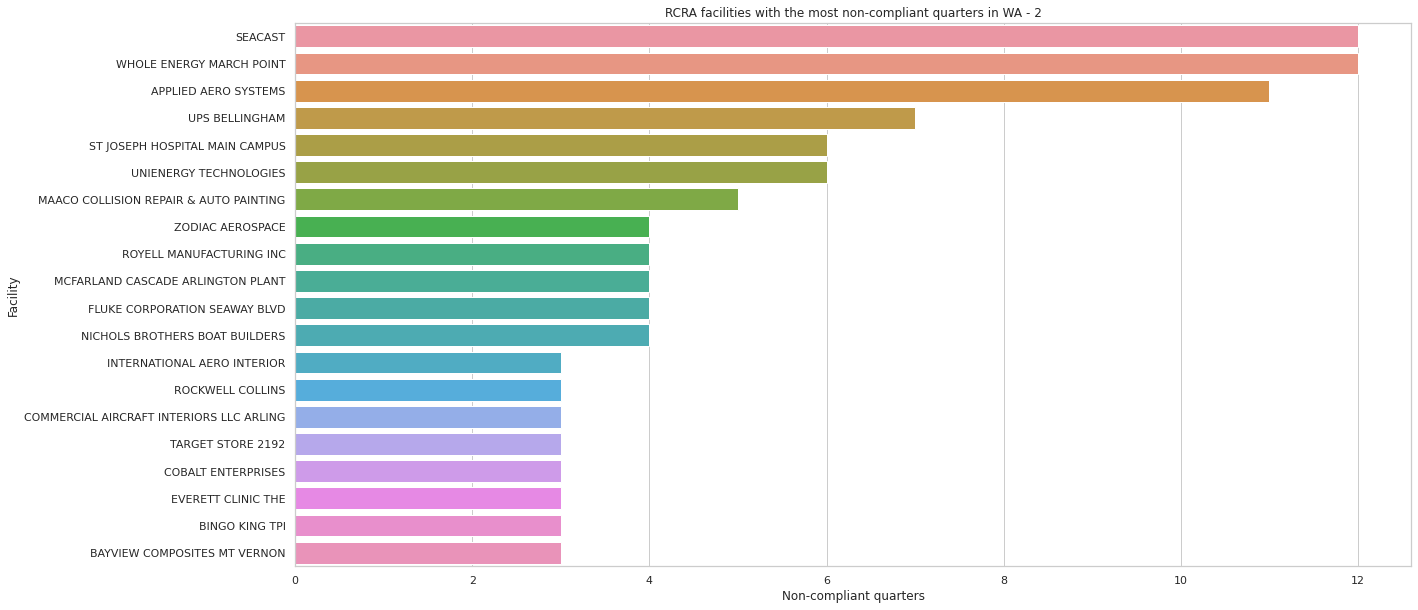

In [5]:
state = state_widget.value if state_widget is not None else None
region_selected = None
if ( region_type != 'State' ):
    region_selected = region_widget.value
df_active = get_active_facilities( state, region_type, region_selected )

df_violators = get_top_violators( df_active, 'AIR_FLAG', state, region_selected, 
        'CAA_3YR_COMPL_QTRS_HISTORY', 'CAA_FORMAL_ACTION_COUNT', 20 )
display( chart_top_violators( df_violators, state, region_selected, 'CAA' ))

df_violators = get_top_violators( df_active, 'NPDES_FLAG', state, region_selected, 
        'CWA_13QTRS_COMPL_HISTORY', 'CWA_FORMAL_ACTION_COUNT', 20 )
display( chart_top_violators( df_violators, state, region_selected, 'CWA' ))

df_violators = get_top_violators( df_active, 'RCRA_FLAG', state, region_selected, 
        'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FORMAL_ACTION_COUNT', 20 )
display( chart_top_violators( df_violators, state, region_selected, 'RCRA' ))


## Get program-specific data for all the facilities in the region.
### First, choose the program (Air, Water, Drinking Water, and Hazardous Waste) and type of data (Emissions, Violations, Inspections, Enforcement) you want to explore

Running the code below will show you a dropdown you can use to make a selection. **Inspections** or **evaluations** are usually the first phase in the enforcement pipeline, how many (but not all) violations are discovered.  **Violations** happen when a facilty is found to be out of compliance with an environmental law, often by violating the terms of its permit issued under that law.  **Enforcement actions** happen when the regulating agency decides to initiate a "case" against a firm for its violation of an environmental law, either by considering some administrative penalty such as a fine or by taking the violator to court. 

What's available for you to look at here:

**Hazardous and Other Waste**:
- RCRA_EVALUATIONS = Inspections under RCRA
- RCRA_VIOLATIONS = Violations of RCRA rules
- RCRA_ENFORCEMENTS = Enforcement actions taken by state agencies and the EPA

Here's where you can find definitions of terms used in the columns of RCRA data: 
https://echo.epa.gov/tools/data-downloads/rcrainfo-download-summary 

**Air**:
- ICIS-AIR_VIOLATION_HISTORY = CAA violations
- ICIS-AIR_FCES_PCES = Both state and federal CAA compliance evaluations
- ICIS-AIR_FORMAL_ACTIONS = CAA formal enforcement actions

Here's where you can find definitions of terms used in the columns of Clean Air Act data: 
https://echo.epa.gov/tools/data-downloads/icis-air-download-summary

**Air Emissions** (Combined air emissions data for stationary sources from four EPA air programs: National Emissions Inventory (NEI), Greenhouse Gas Reporting Program (GHGRP), Toxic Release Inventory (TRI), and Clean Air Markets (CAMD)):
- Greenhouse Gases via POLL_RPT_COMBINED_EMISSIONS
- Toxic Releases via POLL_RPT_COMBINED_EMISSIONS

Here's where you can find definitions of terms used in the columns of this data: https://echo.epa.gov/tools/data-downloads/air-emissions-download-summary

**Water** (National Pollutant Discharge Elimination System, or NPDES):
- NPDES_QNCR_HISTORY = CWA Quarterly Non-Compliance History
- NPDES_INSPECTIONS = CWA Inspections
- NPDES_FORMAL_ENFORCEMENT_ACTIONS = CWA Enforcements

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/icis-npdes-download-summary

**Drinking Water** (Safe Drinking Water Act, or SDWA):
- SDWA_PUB_WATER_SYSTEMS = Public Water Systems under Safe Drinking Water Act
- SDWA_SITE_VISITS = Safe Drinking Water Site Visits
- SDWA_VIOLATIONS = Safe Drinking Water Violations
- SDWA_SERIOUS_VIOLATORS = Safe Drinking Water Serious Violators
- SDWA_ENFORCEMENTS = Safe Drinking Water Enforcements
- SDWA_RETURN_TO_COMPLIANCE = Safe Drinking Water Return to Compliance

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/sdwa-download-summary

### 6. This cell creates data sets for facilities in the region and presents a dropdown selection.

In [6]:
data_sets = make_data_sets()

data_set_widget = show_data_set_widget( data_sets )

Dropdown(description='Data sets:', options=('RCRA Violations', 'RCRA Inspections', 'RCRA Penalties', 'ICIS EPA…

### 7. Once you've chosen the program and data type you want to focus on...
....run the code below, which will access our database and retrieve the information. 
#### This is the main query of the remote database.  It may take some time if there are thousands of facilities in your region that report to the selected program.

In [7]:
%%time
program = data_sets[ data_set_widget.value ]
program_results = program.store_results( region_type=region_type, 
                            region_value=region_selected, state=state )
program_data = None
if ( program_results is not None ):
    program_data = program_results.dataframe.copy()

    display( program_data )
else:
    print( "There is no data for this data set in this region.")

There were 72 program records found


,ENF_IDENTIFIER,ACTIVITY_ID,ACTIVITY_TYPE_CODE,ENF_TYPE_CODE,ENF_TYPE_DESC,AGENCY,SETTLEMENT_ENTERED_DATE,FED_PENALTY_ASSESSED_AMT,STATE_LOCAL_PENALTY_AMT,FAC_NAME,...,FAC_ZIP,FAC_COUNTY,FAC_EPA_REGION,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,DFR_URL
NPDES_ID,,,,,,,,,,,,,,,,,,,,,
WAU000349,10-1998-0055,55518,AFR,309,CWA 309 AO For Compliance (Old),EPA,06/15/1998,NaN,NaN,WESEN FARMS INC - DAIRY FARM,...,98232,SKAGIT,10,48.539490,-122.389220,171100020304,2,14.901,86.89,http://echo.epa.gov/detailed-facility-report?f...
WAU000349,10-1998-N029,3200296977,AFR,309A,CWA 309A AO For Compliance,EPA,06/15/1998,NaN,NaN,WESEN FARMS INC - DAIRY FARM,...,98232,SKAGIT,10,48.539490,-122.389220,171100020304,2,14.901,86.89,http://echo.epa.gov/detailed-facility-report?f...
WAR302945,WA-733235,3600139251,AFR,SCWAAO,State CWA Non Penalty AO,State,05/20/2015,NaN,NaN,BOEING COMMERCIAL AIRPLANE GROUP EVERETT,...,98204,SNOHOMISH,10,47.923302,-122.273197,171100190202,2,36.915,3644.79,http://echo.epa.gov/detailed-facility-report?f...
WAR012559,WA-183134,3400058300,AFR,SCWAAPO,State CWA Penalty AO,State,02/28/2012,NaN,NaN,SR 529 EBEY SLOUGH BRIDGE,...,98270,SNOHOMISH,10,48.045950,-122.178687,171100110203,2,25.755,1903.18,http://echo.epa.gov/detailed-facility-report?f...
WAU000571,10-2013-0129,3400134282,AFR,309G2B,CWA 309G2B AO For Class II Penalties,EPA,09/23/2013,13500.0,NaN,MARY'S-A-WRECK AUTO PARTS AND RECYCLING,...,98204,SNOHOMISH,10,47.877199,-122.267849,171100120303,2,39.227,4299.13,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WA0029432,10-1991-N035,3200296962,AFR,309A,CWA 309A AO For Compliance,EPA,08/15/1991,NaN,NaN,LA CONNER STP,...,98273,SKAGIT,10,48.391534,-122.485124,171100070204,2,23.327,187.26,http://echo.epa.gov/detailed-facility-report?f...
WAR306720,WA-783794,3601554420,AFR,SCWAAO,State CWA Non Penalty AO,State,07/11/2018,NaN,NaN,L300 LYNNWOOD LINK EXTENSION,...,98043,NaN,10,47.788502,-122.316345,171100120400,2,29.909,4612.08,http://echo.epa.gov/detailed-facility-report?f...
WAR000679,10-2019-0002,3601583209,AFR,309G2B,CWA 309G2B AO For Class II Penalties,EPA,11/13/2018,22500.0,NaN,BORNSTEIN SEAFOODS INC,...,98225,WHATCOM,10,48.754620,-122.493118,171100040700,2,19.447,3557.33,http://echo.epa.gov/detailed-facility-report?f...


CPU times: user 125 ms, sys: 2.28 ms, total: 128 ms
Wall time: 820 ms


## Create an interactive map of all of the facilities in the area that report to EPA under the selected program (CAA, CWA, RCRA, etc.)
### 8. Once you run this cell, a map should appear. Facilities will be clustered by area. You can zoom in and click on each facility to get its name and a link to a more detailed report.

_Note:_ You might find that there are some facilities located outside of the region you selected. That's probably because of an issue in how EPA generates spatial information for facilities.

States with a large number of facilities may not display properly

In [8]:
import geopandas

if ( program_data is not None ):
    df_to_map = program_data.loc[~program_data.index.duplicated(keep='first')]
    
    map_of_facilities = mapper(df_to_map)
    if ( region_type == 'State' or region_type == 'Congressional District' ):
        if ( region_type == 'Congressional District' and region_selected is not None ):
            url = "https://raw.githubusercontent.com/unitedstates/districts/gh-pages/cds/2016/{}-{}/shape.geojson".format( state, str(region_selected))
            map_data = geopandas.read_file(url)
            w = folium.GeoJson(
                map_data,
                name = "EPA Regions",
            ).add_to(map_of_facilities) #m is the map object created to hold the facility points. we want to add this shape object to that map object
            folium.GeoJsonTooltip(fields=["District"]).add_to(w)
        if ( region_type == 'State' ):
            url = "https://github.com/edgi-govdata-archiving/ECHO-Geo/raw/main/states.geojson"
            map_data = geopandas.read_file( url )
            state_data = map_data[ map_data['STUSPS'] == state ]
            w = folium.GeoJson( state_data, name="State" ).add_to( map_of_facilities )

    display( map_of_facilities ) 
else:
    print( "There are no facilities in the region for this data set." )   


## In this section you may save the data to your computer.
### 9.  In this cell you may save the program data for your region to your computer.
This next cell allows you to save the data from the particular program for your chosen region to your computer.

#### Accessing your files
Click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
if ( len( program_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=program_data, base=program.name, type=region_type_widget.value, 
           state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

### 10. Chart this data set

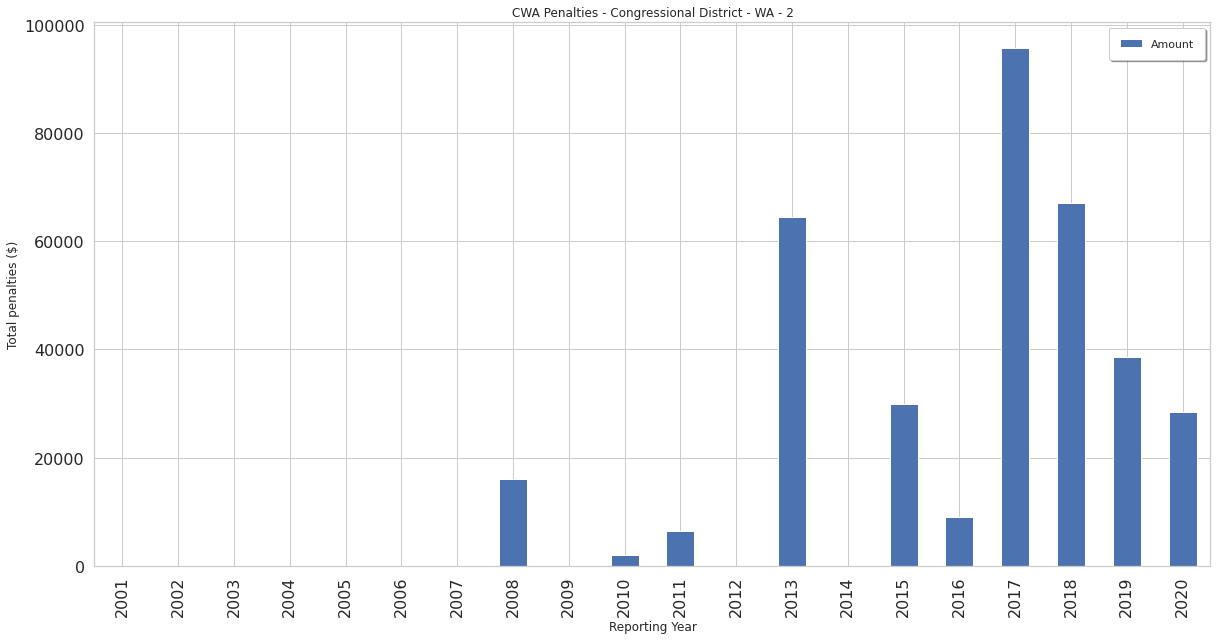

In [9]:
program_results.show_chart()

#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu above and choose a different program/data type, run the database access code, and then chart and map it!

---

## Choose a specific facility
### 11. In the next few blocks of code, you can focus in on just one facility in the region.
Run the below cell, then choose a facility from the dropdown that appears.

In [10]:
fac_series = program_data["FAC_NAME"]
fac_widget = show_fac_widget( fac_series )

Dropdown(description='Facility Name:', layout=Layout(width='70%'), options=('AMBERSON EGG FARM - CHICKEN EGG F…

### 12. Let's see the data for this facility

In [11]:
fac_pgm_data = program_data[ program_data["FAC_NAME"] == fac_widget.value ]

pd.set_option('display.max_colwidth', -1)

if ( fac_pgm_data is None or len( fac_pgm_data ) == 0 ):
    print( "There is no {} data for {} ".format( fac_pgm_widget.value, fac_widget.value ))
else:
    display( fac_pgm_data )

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,ENF_IDENTIFIER,ACTIVITY_ID,ACTIVITY_TYPE_CODE,ENF_TYPE_CODE,ENF_TYPE_DESC,AGENCY,SETTLEMENT_ENTERED_DATE,FED_PENALTY_ASSESSED_AMT,STATE_LOCAL_PENALTY_AMT,FAC_NAME,...,FAC_ZIP,FAC_COUNTY,FAC_EPA_REGION,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,DFR_URL
NPDES_ID,,,,,,,,,,,,,,,,,,,,,
WA0023744,WA-780539,3601452353,AFR,SCWAAO,State CWA Non Penalty AO,State,02/15/2018,NaN,NaN,BELLINGHAM POST POINT WWTP,...,98225,WHATCOM,10,48.717831,-122.513963,171100040604,2,15.343,2945.03,http://echo.epa.gov/detailed-facility-report?fid=110061176016
WA0023744,WA-778353,3601452337,AFR,SCWAAO,State CWA Non Penalty AO,State,10/31/2017,NaN,NaN,BELLINGHAM POST POINT WWTP,...,98225,WHATCOM,10,48.717831,-122.513963,171100040604,2,15.343,2945.03,http://echo.epa.gov/detailed-facility-report?fid=110061176016


### 13. This cell saves this facility's data for this program to your computer.
The next cell exports this data to your computer.  You can return to the dropdown to export additional data files.

#### Accessing your files
Click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
# fac_pgm_data = add_fac_to_pgm_data( fac_pgm_data, fac_data )
if ( len( fac_pgm_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=fac_pgm_data, base=program.name+'-'+fac_widget.value, 
               type=region_type_widget.value, state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

### If you'd like to look at another dimension of ECHO data for this facility...
....return to the dropdown menu above and choose a different program/data type, then run it!